In [16]:
pip install seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Prétraitement des données
print("1. Chargement et prétraitement des données IMDB")

# Chargement du dataset
df = pd.read_csv('/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_5/DATASET/IMDB_Dataset.csv')
print(f"Dimensions du dataset: {df.shape}")

# Conversion des sentiments en valeurs binaires
df['sentiment'] = (df['sentiment'] == 'positive').astype(int)

# Tokenization des reviews
MAX_WORDS = 10000  # Taille du vocabulaire
MAX_LENGTH = 200   # Longueur maximale des séquences
BATCH_SIZE = 512
EPOCHS = 20

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=MAX_LENGTH)
y = df['sentiment'].values

# Split des données
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Données d'entraînement: {X_train.shape}")
print(f"Données de validation: {X_val.shape}")
print(f"Données de test: {X_test.shape}")


1. Chargement et prétraitement des données IMDB
Dimensions du dataset: (50000, 2)
Données d'entraînement: (35000, 200)
Données de validation: (7500, 200)
Données de test: (7500, 200)


In [3]:
# 2. Construction du modèle
print("\n2. Construction du modèle pour l'analyse de sentiments")

# Définition de la couche d'entrée explicite
inputs = tf.keras.Input(shape=(MAX_LENGTH,))

# Construction du modèle avec l'API fonctionnelle
model = tf.keras.Sequential([
    # Couche d'entrée avec normalisation
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Normalization(),
    
    # Couches denses avec régularisation
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    # Couche de sortie
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Affichage du résumé du modèle
print("\nArchitecture du modèle:")
model.summary()



2. Construction du modèle pour l'analyse de sentiments

Architecture du modèle:


2025-03-05 22:19:00.181872: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-03-05 22:19:00.181955: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-03-05 22:19:00.181966: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-03-05 22:19:00.182008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-05 22:19:00.182032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 200)            │           401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,074 (363.57 KB)

 Trainable params: 92,673 (362.00 KB)

 Non-trainable params: 401 (1.57 KB)

Démarrage de l'entraînement du modèle:
Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5022 - loss: 7.9164 - val_accuracy: 0.5087 - val_loss: 1.5104
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5002 - loss: 1.6747 - val_accuracy: 0.4919 - val_loss: 0.7008
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5063 - loss: 0.6979 - val_accuracy: 0.5081 - val_loss: 0.6930
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4956 - loss: 0.6934 - val_accuracy: 0.4919 - val_loss: 0.6934
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4919 - val_loss: 0.6932
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


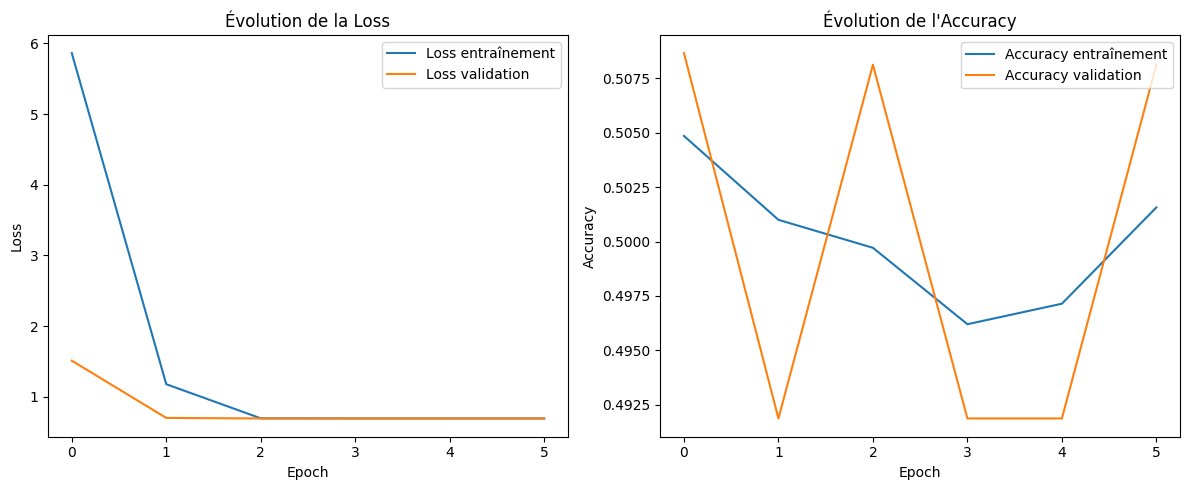

In [6]:
# Définition du early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Métrique à surveiller
    patience=3,              # Nombre d'époques à attendre avant d'arrêter
    restore_best_weights=True,  # Restaure les meilleurs poids
    verbose=1                # Affiche les messages d'information
)

# 2. Entraînement du modèle
print("Démarrage de l'entraînement du modèle:")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,          # Taille de batch adaptée
    epochs=20,              # Nombre maximum d'époques
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Visualisation de l'entraînement (comme dans votre projet de régression R² = 0.82)
plt.figure(figsize=(12, 5))

# Graphique de la loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Évolution de la Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Graphique de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# 4. Évaluation du modèle
print("\n4. Évaluation du modèle")

# Détermination du nombre optimal d'epochs
optimal_epochs = np.argmin(history.history['val_loss']) + 1
print(f"\nNombre optimal d'epochs: {optimal_epochs}")

# Réentraînement avec le nombre optimal d'epochs
print("\nRéentraînement du modèle avec le nombre optimal d'epochs")
model_optimal = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(MAX_LENGTH,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimal.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_optimal = model_optimal.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=optimal_epochs,
    validation_data=(X_val, y_val),
    verbose=1
)


4. Évaluation du modèle

Nombre optimal d'epochs: 3

Réentraînement du modèle avec le nombre optimal d'epochs
Epoch 1/3
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4962 - loss: 550.6394 - val_accuracy: 0.4973 - val_loss: 196.8693
Epoch 2/3
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4874 - loss: 174.9806 - val_accuracy: 0.5043 - val_loss: 132.4143
Epoch 3/3
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5064 - loss: 144.6113 - val_accuracy: 0.5060 - val_loss: 146.6060


In [14]:
# 5. Analyse des résultats
print("\n5. Analyse des résultats")
test_loss, test_accuracy = model_optimal.evaluate(X_test, y_test)
print(f"\nPerformances sur le jeu de test:")
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Comparaison des métriques
print("\nComparaison des métriques:")
print(f"Accuracy entraînement final: {history_optimal.history['accuracy'][-1]:.4f}")
print(f"Accuracy validation final: {history_optimal.history['val_accuracy'][-1]:.4f}")
print(f"Accuracy test: {test_accuracy:.4f}")


5. Analyse des résultats
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5012 - loss: 78.5037

Performances sur le jeu de test:
Loss: 79.1092
Accuracy: 0.5061

Comparaison des métriques:
Accuracy entraînement final: 0.5033
Accuracy validation final: 0.5143
Accuracy test: 0.5061



=== Rapport d'Évaluation Finale ===

1. Métriques de Performance:
   • Accuracy (précision): 0.5037 (50.4%)
   • Loss (perte): 0.6931


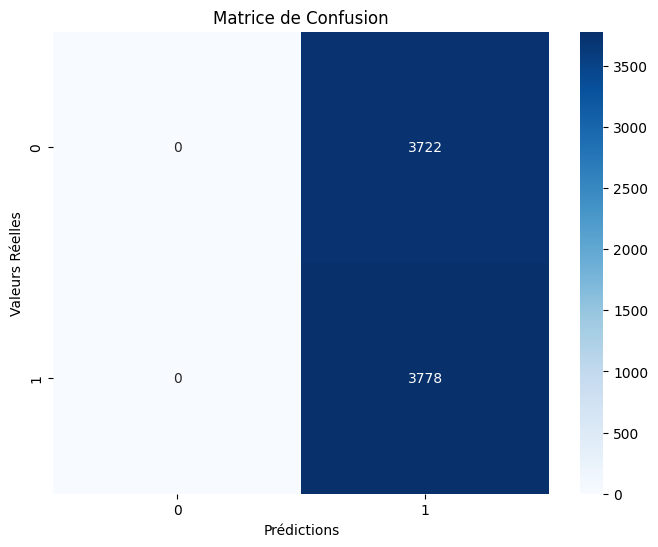


2. Rapport de Classification Détaillé:
              precision    recall  f1-score   support

     Négatif       0.00      0.00      0.00      3722
     Positif       0.50      1.00      0.67      3778

    accuracy                           0.50      7500
   macro avg       0.25      0.50      0.33      7500
weighted avg       0.25      0.50      0.34      7500


3. Interprétation des Résultats:
• Le modèle atteint une précision de 50.4% sur le jeu de test
• La loss finale de 0.6931 indique le niveau d'erreur du modèle
• La matrice de confusion montre la distribution des prédictions correctes et incorrectes


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Évaluation finale
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n=== Rapport d'Évaluation Finale ===")
print(f"\n1. Métriques de Performance:")
print(f"   • Accuracy (précision): {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"   • Loss (perte): {test_loss:.4f}")

# Visualisation avec seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions 
y_pred = model.predict(X_test, verbose=0)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcul des métriques supplémentaires
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Matrice de confusion
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Rapport de classification détaillé
print("\n2. Rapport de Classification Détaillé:")
print(classification_report(y_test, y_pred_binary, 
                          target_names=['Négatif', 'Positif']))

print("\n3. Interprétation des Résultats:")
print(f"• Le modèle atteint une précision de {test_accuracy*100:.1f}% sur le jeu de test")
print(f"• La loss finale de {test_loss:.4f} indique le niveau d'erreur du modèle")
print("• La matrice de confusion montre la distribution des prédictions correctes et incorrectes")


Problèmes identifiés :
- Précision de 0.0 pour la classe "Négatif"
- Recall de 1.0 pour la classe "Positive" (le modèle prédit toujours "Positif")
- F1-score déséquilibré